In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [2]:
import re
import nltk
import string

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
train = pd.read_csv("train.tsv" ,delimiter='\t',encoding='utf-8')
testdata = pd.read_csv("test.tsv" ,delimiter='\t',encoding='utf-8')

train.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

In [5]:
len(train)

156060

In [6]:
#check how many classes
train.Sentiment.unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [7]:
train.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [8]:
train.iloc[0:10]

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   
5         6           1  of escapades demonstrating the adage that what...   
6         7           1                                                 of   
7         8           1  escapades demonstrating the adage that what is...   
8         9           1                                          escapades   
9        10           1  demonstrating the adage that what is good for ...   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  
5          2  
6          2  
7          2  
8          2  
9          2

In [9]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [10]:
train['Phrase'] = np.vectorize(remove_pattern)(train['Phrase'], "make|movi|film|audienc|charact|work|onli|thi|time")
train['Phrase'] = train['Phrase'].str.replace("[^a-zA-Z#]", " ")
train['Phrase'] = train['Phrase'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [11]:
#Tokenization
tokenized_phrase = train['Phrase'].apply(lambda x: x.split())
tokenized_phrase.head()

0    [series, escapades, demonstrating, adage, that...
1    [series, escapades, demonstrating, adage, that...
2                                             [series]
3                                                   []
4                                             [series]
Name: Phrase, dtype: object

In [12]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_phrase = tokenized_phrase.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_phrase.head()

0    [seri, escapad, demonstr, adag, that, what, go...
1    [seri, escapad, demonstr, adag, that, what, go...
2                                               [seri]
3                                                   []
4                                               [seri]
Name: Phrase, dtype: object

In [13]:
for i in range(len(tokenized_phrase)):
    tokenized_phrase[i] = ' '.join(tokenized_phrase[i])

train['phrase1'] = tokenized_phrase

In [14]:
train['phrase1'].head()

0    seri escapad demonstr adag that what good goos...
1       seri escapad demonstr adag that what good goos
2                                                 seri
3                                                     
4                                                 seri
Name: phrase1, dtype: object

In [15]:
#Understanding the common words used in the tweets: WordCloud
from wordcloud import WordCloud , STOPWORDS 
stopwords = set(STOPWORDS) 
all_words = ' '.join([text for text in train['phrase1']])
all_words

'seri escapad demonstr adag that what good goos also good gander some which occasion amus none which amount much stori seri escapad demonstr adag that what good goos seri  seri escapad demonstr adag that what good goos  escapad demonstr adag that what good goos escapad demonstr adag that what good goos demonstr adag demonstr adag  adag that what good goos that what good goos what good goos  good goos good goos  goos goos also good gander some which occasion amus none which amount much stori also good gander some which occasion amus none which amount much stori also also good gander some which occasion amus none which amount much stori gander some which occasion amus none which amount much stori gander some which occasion amus none which amount much stori gander gander gander  some which occasion amus none which amount much stori some which some which which occasion amus none which amount much stori occasion amus none which amount much stori amus none which amount much stori  none which

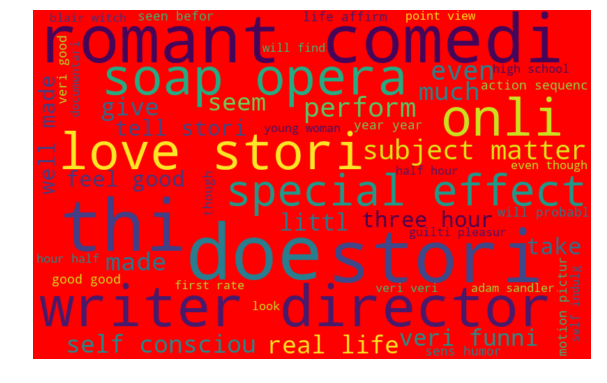

In [16]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110 ,background_color ='red',stopwords = stopwords, max_words=50).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

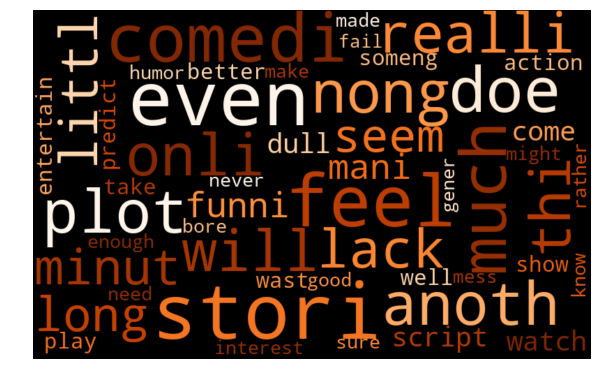

In [17]:
#negative
normal_words =' '.join([text for text in train['phrase1'][train['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap="Oranges_r",stopwords = stopwords,max_words=50).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

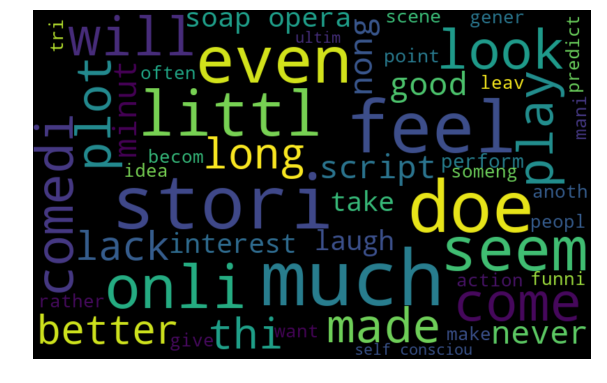

In [18]:
# somewhat negative
normal_words =' '.join([text for text in train['phrase1'][train['Sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,stopwords = stopwords,max_words=50).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

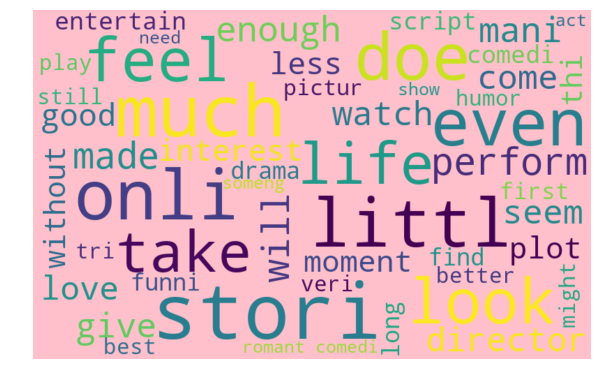

In [19]:
#neutral
normal_words =' '.join([text for text in train['phrase1'][train['Sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color ='pink',stopwords = stopwords,max_words=50).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

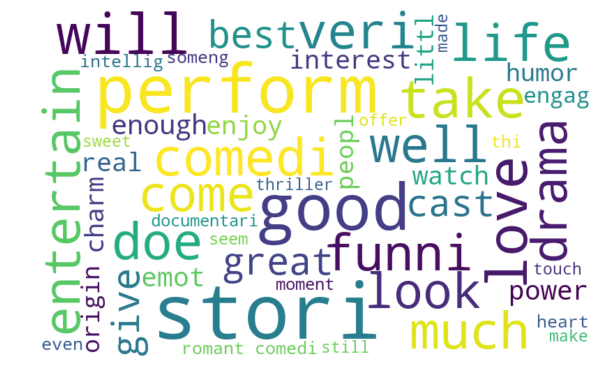

In [20]:
#somewhat positive
normal_words =' '.join([text for text in train['phrase1'][train['Sentiment'] == 3]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color ='white',stopwords = stopwords,max_words=50).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

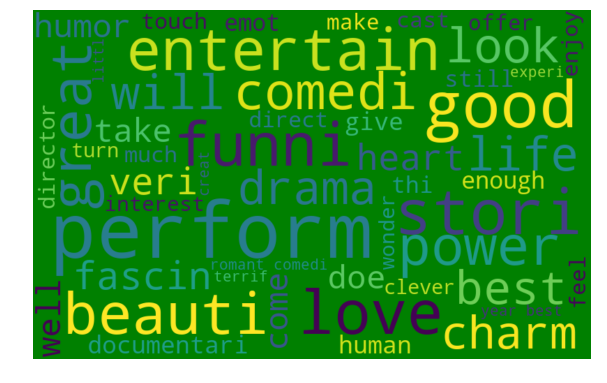

In [21]:
#positive
normal_words =' '.join([text for text in train['phrase1'][train['Sentiment'] == 4]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color ='green',stopwords = stopwords,max_words=50).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
train.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  series escapades demonstrating adage that what...   
1         2           1  series escapades demonstrating adage that what...   
2         3           1                                             series   
3         4           1                                                      
4         5           1                                             series   

   Sentiment                                            phrase1  
0          1  seri escapad demonstr adag that what good goos...  
1          2     seri escapad demonstr adag that what good goos  
2          2                                               seri  
3          2                                                     
4          2                                               seri

In [23]:
#Extracting Features from Cleaned Tweets
#Count Vector

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(train['phrase1'])

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow[1000,:], train['Sentiment'], random_state=42, test_size=0.3)

model = SVC()
model.fit(xtrain_bow, ytrain) # training the model

# prediction = model.predict_proba(xvalid_bow) # predicting on the validation set
# prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
# prediction_int = prediction_int.astype(np.int)

# f1_score(yvalid, prediction_int) # calculating f1 score

model.score(xvalid_bow,yvalid)

ValueError: Found input variables with inconsistent numbers of samples: [1, 156060]